In [2]:
'''General Libraries'''
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 500)

'''Statistic'''
import scipy
from scipy import stats
from scipy.stats import norm
import datetime

'''Scikit Learn'''
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

'''Ploting Libraries'''
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "iframe" 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style 
style.use("fivethirtyeight") 

import seaborn as sns
sns.set_palette('RdBu')

import warnings
warnings.filterwarnings("ignore")

'''Miscellaneous'''

'''Seeds'''
import random
random.seed(10)
np.random.seed(11)

In [3]:
df = pd.read_csv('data_Preprocessed_Onehot.csv')

In [4]:
df

,official,age,gender_F,gender_M,country_ARG,country_AUS,country_AUT,country_BAH,country_BAR,country_BEL,country_BER,country_BLR,country_BOL,country_BRA,country_BRN,country_CAN,country_CAY,country_CHI,country_CHN,country_COL,country_CRC,country_CRO,country_CZE,country_DEN,country_DOM,country_ECU,country_EGY,country_ESA,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GBR,country_GER,country_GRE,country_GUA,country_HKG,country_HUN,country_INA,country_IND,country_IRL,country_ISL,country_ISR,country_ITA,country_JPN,country_KEN,country_KOR,country_LIE,country_LUX,country_MAR,country_MAS,country_MEX,country_NED,country_NOR,country_NZL,country_PAN,country_PER,country_PHI,country_POL,country_POR,country_QAT,country_ROU,country_RSA,country_RUS,country_SIN,country_SLO,country_SUI,country_SVK,country_SWE,country_TAN,country_THA,country_TPE,country_TRI,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_VEN,country_VGB,country_ZIM
0,0.012196,0.460317,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.153041,0.238095,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.365079,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.157316,0.095238,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.001652,0.349206,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31629,0.343982,0.222222,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31630,0.582055,0.253968,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31631,0.528235,0.047619,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31632,0.582606,0.317460,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# K-mean Clustering

## Optimum K

### Elbow Method of Sum Square Distances

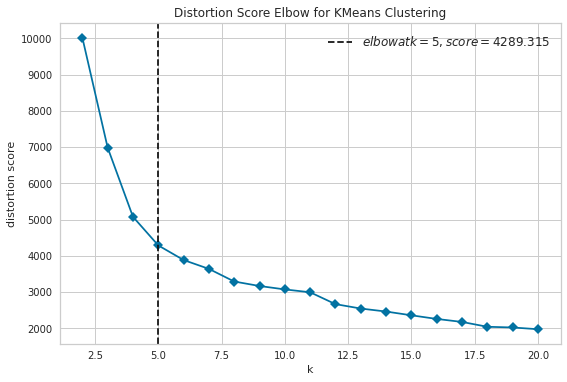

In [34]:
# with Sum of square distances

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21), timings=False)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The ***k of either 3, 4, 5, 6*** probably is the 'elbow point'. Let's take a closer look at the mean Silhouette coefficient.

### Mean Silhouettle Coefficient

***1. Silhouette score*** for EACH sample

***silhouettescore = (b −a) / max(b, a)***  

Where:

>    a = the mean intra-cluster distance.    
>    b =  the mean nearest-cluster distance.

It ranges in ***[-1, 1]***, which is:

* ***+1 Score*** − Near +1 Silhouette score indicates that the sample is ***far away from its neighboring cluster***.
* ***0 Score***  − 0 Silhouette score indicates that the sample is ***on or very close to the decision boundary*** separating two neighboring clusters.
* ***-1 Score*** − 1 Silhouette score indicates that the samples have been assigned to the ***wrong clusters***.

***2. Mean Silhouette score***

Mean scores are shown in the below plot, calculated by taking the mean of silhouette score of all the data points.

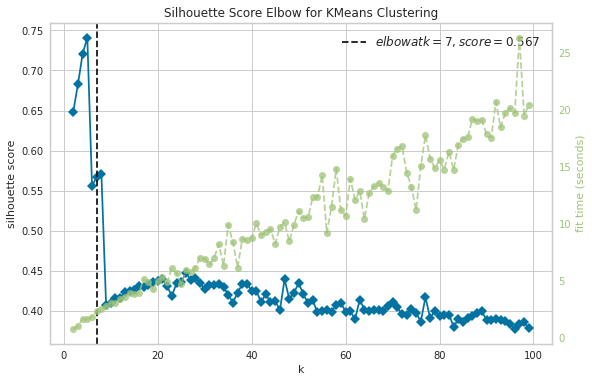

In [47]:
# with Mean Silhouettle coefficient

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(2, 100), 
                              metric='silhouette')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [5]:
# with Mean Silhouettle coefficient

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,21), 
                              metric='silhouette')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

KeyboardInterrupt: 

At k of 5, 6 we got the highest scores, then a sudden drop, and recover at 8, and then continuing increases in the (maybe) end of 20.

So a selection of ***k with 5, 6, 8*** will step to the next round of plotting.

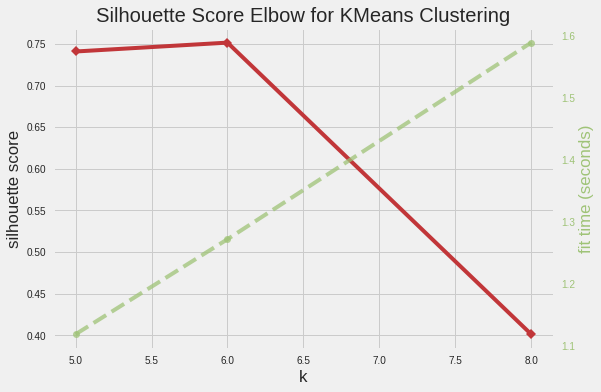

In [6]:
# with Mean Silhouettle coefficient

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=[5, 6, 8], 
                              metric='silhouette')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Analysis of Mean Average Silhouette Coefficient

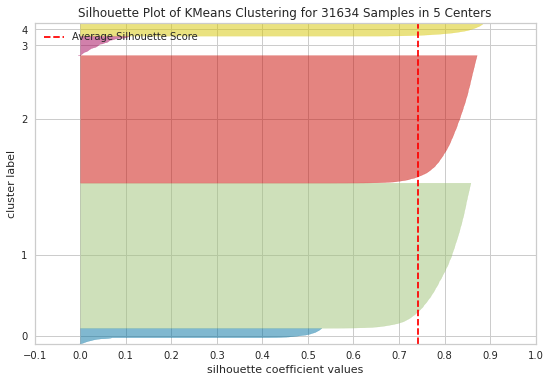

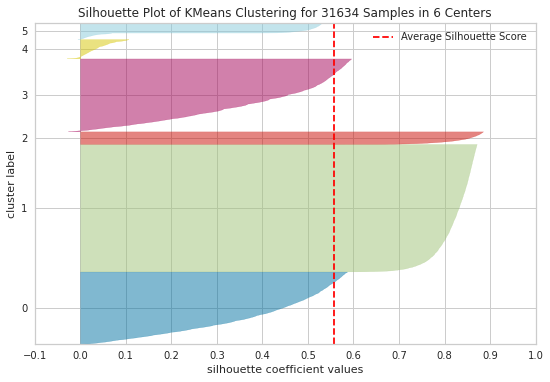

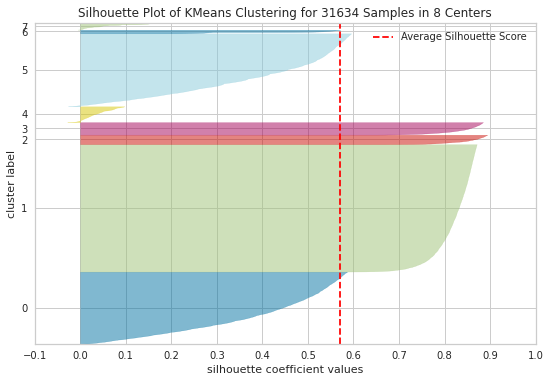

In [35]:
# Average Silhouette score
from yellowbrick.cluster import silhouette_visualizer

the_range = [5, 6, 8]

for k in the_range:
    silhouette_visualizer(KMeans(k, random_state=10), df, colors='yellowbrick')

Searching for the optimum k of clusters, we plot the average score and expect:
* Firstly, The mean value should be as ***close to 1*** as possible
* Secondly, The plot of each cluster should be ***above the mean value*** as much as possible. Any plot region below the mean value is not desirable.
* Lastly, the ***width of the plot should be as uniform*** as possible.

***Comments***
* All of plot respecting to k have below-average clusters.
* At k of 15 and 20, some clusters are too thin, is thers a signal of overfit (over-clustering)?

I don't know how to interprete better, so I take a shot at BIC score with a Gaussian Mixture Model. Let's choose ***k = 6***.

# Evaluation

With the optimum k of 6, we evaluate our k-means clustering.

In [44]:
optimum_k = 6

clusterer = KMeans(n_clusters=optimum_k, random_state=10)
cluster_labels = clusterer.fit_predict(df)

# Silhouette score
score = silhouette_score(df, cluster_labels)
print('Silhouette score of K-means clustering, k = 6: ', score)

Silhouette score of K-means clustering, k = 6:  0.556208592083098


## Clustering Labels

In [43]:
# to csv file
cluster = pd.DataFrame(data=cluster_labels, columns=['cluster'])

cluster.to_csv('clusterLabel_kmeans_6.csv', index=False)

# Draft

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


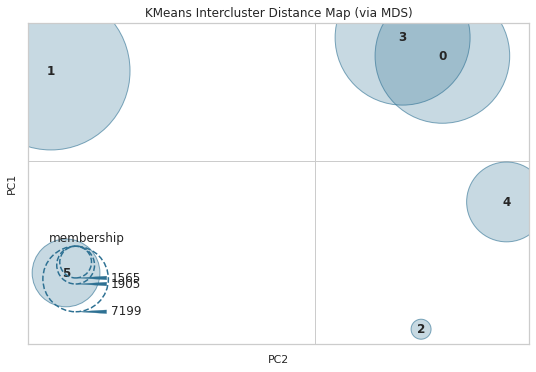

In [45]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=optimum_k, random_state=10)
visualizer = InterclusterDistance(model)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure